**Name: Christ-Brian Amedjonekou**  
**Date: 4/14/2019**  
**MAT 4880-D692 (Math Modeling II) Simulations HW 1**  
**Spring 2019, Section: D692, Code: 36561**  
**Instructor: Johann Thiel**

### Index

**| [Question 1](#Question-1:) | [Question 9](#Question-9:) |**

### Question 1:

**| [Part A](#Part-A:) | [Part B](#Part-B:) | [Part C](#Part-C:) | [Part D](#Part-D:) | [Index](#Index) |**

* Reconsider the war problem of Example 6.1. In this problem, ew explore the effects of weather on combat. Bad weather and poor visibility decrease the effectiveness of direct fire weapons for both sides. The effectiveness of indirect fire weapons is relatively unaffected by the weather. We can represent the effects of bad weather in our model as follows. Let $w$ denote the decrease in weapon effectiveness caused by bad weather conditions and replace the dynamical system in Eq. (6.3) by 

$$\Delta x_1 = -w \lambda (0.05)x_2 - \lambda (0.005)x_1x_2$$  
$$\Delta x_2 = -w (0.05)x_2 - (0.005)x_1x_2$$  

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Red vs. Blue Simulation 

**Variables**

$R = \text{# of Red Divisions}$

$B = \text{# of Blue Divisions}$

$D_R = \text{red rate of attrition due to direct Fire (units/hour)}$

$D_B = \text{blue rate of attrition due to direct Fire (units/hour)}$

$I_R = \text{red rate of attrition due to indirect Fire (units/hour)}$

$I_B = \text{blue rate of attrition due to indirect Fire (units/hour)}$

**Assumptions**

$D_R = a_1B$

$D_B = a_2R$

$I_R = b_1BR$

$I_B = b_2BR$

$R, B \geq 0$

$R(0) = 5, B(0) = 2$

$a_1, a_2, b_1, b_2 \text{ are all positive}$

$a_1 > a_2; b_1 > b_2$

**Objective**

Determine conditions under which $R \rightarrow 0$ and $B \rightarrow 0$

### Version 1 w/ For Loop


```python
def deltaX1(R, B, lambda_): 
    return -lambda_*0.05*B - lambda_*0.005*B*R

def deltaX2(R, B): 
    return-0.05*B - 0.005*B*R

def red_vs_blueSIM(lambda_, L, N):  
    for i in range(N):
        x1_last, x2_last = L[-1][0], L[-1][1]
        x1_next = x1_last + deltaX1(x1_last, x2_last, lambda_)
        x2_next = x2_last + deltaX2(x1_last, x2_last)
        L.append([x1_next, x2_next])
        result = L
    return result
```

### Version 2 w/ While Loop

In [2]:
def deltaX1(weather, R, B, lambda_): 
    return (-weather*lambda_*0.05*B) - (lambda_*0.005*B*R)

def deltaX2(weather, R, B): 
    return (-weather*0.05*B) - (0.005*B*R)


def red_vs_blueSIM(weather, lambda_, L):   
    count = 0
    while (L[-1][0] > 0 and L[-1][1] > 0):
        x1_last, x2_last = L[-1][0], L[-1][1]
        x1_next = x1_last + deltaX1(weather, x1_last, x2_last, lambda_)
        x2_next = x2_last + deltaX2(weather, x1_last, x2_last)
        L.append([x1_next, x2_next])
        count += 1
        if count == 300:
            return L
    return L

##### Part A:

**| [Question 1](#Question-1:) |**

* Create a computer simulation with $\lambda = 3$, and $w = 0.25$
    * [Check Below](#Simulation)


* Who wins the battle, how long does is take?
    * **The blue division wins this battle.**
    * **Base upon the [Table](#Table-Part-A), it takes about 91 hours**
    
    
* How many remaining troops on the winning side?
    * **The Blue Teams started off w/ 2 divisions, but finished with a little more than $\frac{1}{3}$ of a division. Again this is based off the table results**

##### Simulation

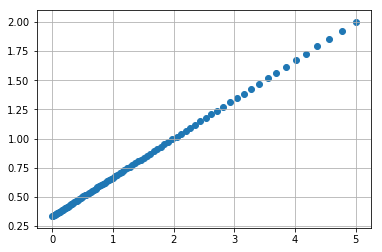

In [3]:
result = np. array(red_vs_blueSIM(weather= 0.25, lambda_= 3, L= [[5, 2]]))
fig, ax1 = plt.subplots()
ax1.scatter(result[:, 0], result[:, 1])
ax1.grid()

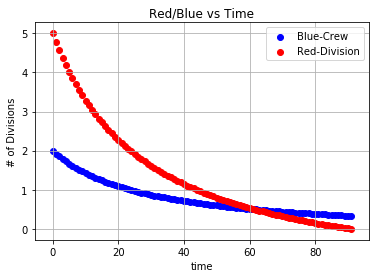

In [4]:
t = np.arange(0, result.shape[0])
fig1, ax2 = plt.subplots()
ax2.scatter(t, result[:, 1], c= 'b', label= 'Blue-Crew')
ax2.scatter(t, result[:, 0], c= 'r', label= 'Red-Division')
ax2.set(xlabel= 'time', ylabel= '# of Divisions', 
        title= 'Red/Blue vs Time')
ax2.legend(loc= 'upper right')
ax2.grid()

##### Table Part A

In [5]:
table = {'Time': t,'Red $W = 0.25$': result[:,0], 'Blue $W = 0.25$': result[:,1]}
df1 = pd.DataFrame.from_dict(table)
df1.tail()

,Time,Red $W = 0.25$,Blue $W = 0.25$
87,87,0.051766,0.350589
88,88,0.038347,0.346116
89,89,0.025168,0.341723
90,90,0.012225,0.337408
91,91,-0.000490,0.333170


##### Part B:

**| [Question 1](#Question-1:) |**

* Repeat now for cases $w = 0.1, 0.2, 0.5, 0.75, 0.9$
* Put results in a table and answer same questions as Part A


* Who wins the battle, how long does is take?
    * **The blue division wins this battle.**
    * **Base upon the [Table](#Table-Part-B), it takes about:**
        * **165 hours if $w = 0.1$**
        * **107 hours if $w = 0.2$**
        * **54 hours if $w = 0.5$**
        * **39 hours if $w = 0.75$**
        * **33 hours if $w = 0.9$**
    
    
* How many remaining troops on the winning side?
    * **The Blue Teams started off w/ 2 divisions, but finished with approx $\frac{1}{3}$ of a division. Again this is based off the table results**


In [6]:
# Results from the simulation where 𝑤 = 0.1, 0.2, 0.5, 0.75, 0.9
result1 = np. array(red_vs_blueSIM(0.1, lambda_= 3, L= [[5,2]]))
result2 = np. array(red_vs_blueSIM(0.2, lambda_= 3, L= [[5,2]]))
result3 = np. array(red_vs_blueSIM(0.5, lambda_= 3, L= [[5,2]]))
result4 = np. array(red_vs_blueSIM(0.75, lambda_= 3, L= [[5,2]]))
result5 = np. array(red_vs_blueSIM(0.9, lambda_= 3, L= [[5,2]]))

In [7]:
# Creates Dictionaries for each table prior to using 'pd.DataFrame.from_dict()' to create a dataframe
piece1 = {'Time': np.arange(0, result1.shape[0]), 'Red $W = 0.1$': result1[:,0], 'Blue $W = 0.1$': result1[:,1]}
piece2 = {'Time': np.arange(0, result2.shape[0]), 'Red $W = 0.2$': result2[:,0], 'Blue $W = 0.2$': result2[:,1]}
piece3 = {'Time': np.arange(0, result3.shape[0]), 'Red $W = 0.5$': result3[:,0], 'Blue $W = 0.5$': result3[:,1]} 
piece4 = {'Time': np.arange(0, result4.shape[0]), 'Red $W = 0.75$': result4[:,0],'Blue $W = 0.75$': result4[:,1]}
piece5 = {'Time': np.arange(0, result5.shape[0]), 'Red $W = 0.9$': result5[:,0], 'Blue $W = 0.9$': result5[:,1]}

In [8]:
# Creates Dataframe using 'pd.DataFrame.from_dict()' 
df1 = pd.DataFrame.from_dict(piece1)
df2 = pd.DataFrame.from_dict(piece2)
df3 = pd.DataFrame.from_dict(piece3)
df4 = pd.DataFrame.from_dict(piece4)
df5 = pd.DataFrame.from_dict(piece5)
frames = [df1, df2, df3, df4, df5]

##### Table Part B

In [9]:
# Combines the litte dataframes to make a larger one
table1 = pd.concat(frames, axis=1)
table1.head(56)

,Time,Red $W = 0.1$,Blue $W = 0.1$,Time,Red $W = 0.2$,Blue $W = 0.2$,Time,Red $W = 0.5$,Blue $W = 0.5$,Time,Red $W = 0.75$,Blue $W = 0.75$,Time,Red $W = 0.9$,Blue $W = 0.9$
0,0,5.000000,2.000000,0.0,5.000000,2.000000,0.0,5.000000,2.000000,0.0,5.000000,2.000000,0.0,5.000000,2.000000
1,1,4.820000,1.940000,1.0,4.790000,1.930000,1.0,4.700000,1.900000,1.0,4.625000,1.875000,1.0,4.580000,1.860000
2,2,4.650638,1.883546,2.0,4.593430,1.864476,2.0,4.423550,1.807850,2.0,4.283984,1.761328,2.0,4.201118,1.733706
3,3,4.490989,1.830330,3.0,4.409030,1.803010,3.0,4.168005,1.722668,3.0,3.972652,1.657551,3.0,3.857815,1.619272
4,4,4.340235,1.780078,4.0,4.235697,1.745232,4.0,3.931103,1.643701,4.0,3.687405,1.562468,4.0,3.545511,1.515170
5,5,4.197644,1.732548,5.0,4.072456,1.690819,5.0,3.710902,1.570301,5.0,3.425205,1.475068,5.0,3.260382,1.420127
6,6,4.062567,1.687522,6.0,3.918444,1.639481,6.0,3.505721,1.501907,6.0,3.183474,1.394491,6.0,2.999212,1.333071
7,7,3.934419,1.644806,7.0,3.772897,1.590966,7.0,3.314099,1.438033,7.0,2.960004,1.320001,7.0,2.759275,1.253092
8,8,3.812676,1.604225,8.0,3.635130,1.545043,8.0,3.134760,1.378253,8.0,2.752896,1.250965,8.0,2.538244,1.179415
9,9,3.696867,1.565622,9.0,3.504532,1.501511,9.0,2.966583,1.322194,9.0,2.560505,1.186835,9.0,2.334118,1.111373


In [10]:
table1.tail(60)

,Time,Red $W = 0.1$,Blue $W = 0.1$,Time,Red $W = 0.2$,Blue $W = 0.2$,Time,Red $W = 0.5$,Blue $W = 0.5$,Time,Red $W = 0.75$,Blue $W = 0.75$,Time,Red $W = 0.9$,Blue $W = 0.9$
106,106,0.420598,0.473533,106.0,0.002665,0.334222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,107,0.410508,0.470169,107.0,-0.007375,0.330875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,108,0.400560,0.466853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,109,0.390752,0.463584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,110,0.381081,0.460360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,111,0.371544,0.457181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,112,0.362139,0.454046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,113,0.352862,0.450954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,114,0.343710,0.447903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,115,0.334683,0.444894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Part C:

**| [Question 1](#Question-1:) |**

* Which side benefits from fighting in adverse weather conditions? If you were the blue commander, would you expect red to attack on a sunny day or a rainy day?
    * **Based on the table above it took longer for Blue to defeat Red when weather conditions where close to their worst and took less time when weather was close to its best.**
    * **Red benefits from adverse weather**
    * **Blue should expect Red to attack on rainy days versus sunny days**

##### Part D:

**| [Question 1](#Question-1:) |**

* Examine sensitivity of blue over red for parts (a), (b), (c).
    * **If $\lambda < 3.0$ then Red Division wins.**
    * **Otherwise, $\lambda \geq 3$ and The Blue Crew wins.**
    * **This is to say that if The Blue Crew has a weapons advantage of at least 3 times that of Red Division, then the Blue team will always prevail. Weather only stands to delay the inevitable.**
    
    
* Repeat simulation for parts (a) and (b) w/ $\lambda = 1.5, 2.0, 4.0, 5.0$ and put results in a table
    * **[Results Table Part D lambda = 1.5](#Table-Part-D-Lambda-1.5)**
    * **[Results Table Part D lambda = 2.0](#Table-Part-D-Lambda-2.0)**
    * **[Results Table Part D lambda = 4.0](#Table-Part-D-Lambda-4.0)**
    * **[Results Table Part D lambda = 5.0](#Table-Part-D-Lambda-5.0)**


* Reconsider results for part (c); are they still valid?
    * ***The results from [Part C](#Part-C:) are still valid if and only if $\lambda \geq 3$**

##### Calculations Part D  $\lambda = 1.5$

In [11]:
# Results from the simulation where 𝑤 = 0.25, 0.1, 0.2, 0.5, 0.75, 0.9
# 𝜆 = 1.5, 2.0, 4.0, 5.0  
result = np. array(red_vs_blueSIM(weather= 0.25, lambda_= 1.5, L= [[5, 2]]))
result1 = np. array(red_vs_blueSIM(0.1, lambda_= 1.5, L= [[5,2]]))
result2 = np. array(red_vs_blueSIM(0.2, lambda_= 1.5, L= [[5,2]]))
result3 = np. array(red_vs_blueSIM(0.5, lambda_= 1.5, L= [[5,2]]))
result4 = np. array(red_vs_blueSIM(0.75, lambda_= 1.5, L= [[5,2]]))
result5 = np. array(red_vs_blueSIM(0.9, lambda_= 1.5, L= [[5,2]]))

In [12]:
# Creates Dictionaries for each table prior to using 'pd.DataFrame.from_dict()' to create a dataframe
piece = {'Time': np.arange(0, result.shape[0]),'Red $W = 0.25$': result[:,0], 'Blue $W = 0.25$': result[:,1]}
piece1 = {'Time': np.arange(0, result1.shape[0]), 'Red $W = 0.1$': result1[:,0], 'Blue $W = 0.1$': result1[:,1]}
piece2 = {'Time': np.arange(0, result2.shape[0]), 'Red $W = 0.2$': result2[:,0], 'Blue $W = 0.2$': result2[:,1]}
piece3 = {'Time': np.arange(0, result3.shape[0]), 'Red $W = 0.5$': result3[:,0], 'Blue $W = 0.5$': result3[:,1]} 
piece4 = {'Time': np.arange(0, result4.shape[0]), 'Red $W = 0.75$': result4[:,0],'Blue $W = 0.75$': result4[:,1]}
piece5 = {'Time': np.arange(0, result5.shape[0]), 'Red $W = 0.9$': result5[:,0], 'Blue $W = 0.9$': result5[:,1]}

In [13]:
# Creates Dataframe using 'pd.DataFrame.from_dict()' 
df = pd.DataFrame.from_dict(piece)
df1 = pd.DataFrame.from_dict(piece1)
df2 = pd.DataFrame.from_dict(piece2)
df3 = pd.DataFrame.from_dict(piece3)
df4 = pd.DataFrame.from_dict(piece4)
df5 = pd.DataFrame.from_dict(piece5)
frames = [df, df1, df2, df3, df4, df5]

##### Table Part D Lambda 1.5 

[Jump Back](#Part-D:)

In [14]:
# Combines the litte dataframes to make a larger one
table1 = pd.concat(frames, axis=1)
table1.tail()

,Time,Red $W = 0.25$,Blue $W = 0.25$,Time,Red $W = 0.1$,Blue $W = 0.1$,Time,Red $W = 0.2$,Blue $W = 0.2$,Time,Red $W = 0.5$,Blue $W = 0.5$,Time,Red $W = 0.75$,Blue $W = 0.75$,Time,Red $W = 0.9$,Blue $W = 0.9$
296,296,2.002113,0.001409,296,2.017026,0.011351,296,2.004290,0.002860,296,2.000055,0.000036,296,2.000001,8.315955e-07,296,2.0,8.279232e-08
297,297,2.002066,0.001377,297,2.016769,0.011179,297,2.004205,0.002803,297,2.000053,0.000035,297,2.000001,7.920947e-07,297,2.0,7.823874e-08
298,298,2.002019,0.001346,298,2.016516,0.011011,298,2.004120,0.002747,298,2.000051,0.000034,298,2.000001,7.544702e-07,298,2.0,7.393561e-08
299,299,2.001974,0.001316,299,2.016267,0.010845,299,2.004038,0.002692,299,2.000049,0.000033,299,2.000001,7.186329e-07,299,2.0,6.986915e-08
300,300,2.001929,0.001286,300,2.016022,0.010681,300,2.003957,0.002638,300,2.000047,0.000032,300,2.000001,6.844978e-07,300,2.0,6.602635e-08


##### Calculations Part D  $\lambda = 2.0$

In [15]:
# Results from the simulation where 𝑤 = 0.25, 0.1, 0.2, 0.5, 0.75, 0.9
# 𝜆 = 1.5, 2.0, 4.0, 5.0  
result = np. array(red_vs_blueSIM(weather= 0.25, lambda_= 2.0, L= [[5, 2]]))
result1 = np. array(red_vs_blueSIM(0.1, lambda_= 2.0, L= [[5,2]]))
result2 = np. array(red_vs_blueSIM(0.2, lambda_= 2.0, L= [[5,2]]))
result3 = np. array(red_vs_blueSIM(0.5, lambda_= 2.0, L= [[5,2]]))
result4 = np. array(red_vs_blueSIM(0.75, lambda_= 2.0, L= [[5,2]]))
result5 = np. array(red_vs_blueSIM(0.9, lambda_= 2.0, L= [[5,2]]))

In [16]:
# Creates Dictionaries for each table prior to using 'pd.DataFrame.from_dict()' to create a dataframe
piece = {'Time': np.arange(0, result.shape[0]),'Red $W = 0.25$': result[:,0], 'Blue $W = 0.25$': result[:,1]}
piece1 = {'Time': np.arange(0, result1.shape[0]), 'Red $W = 0.1$': result1[:,0], 'Blue $W = 0.1$': result1[:,1]}
piece2 = {'Time': np.arange(0, result2.shape[0]), 'Red $W = 0.2$': result2[:,0], 'Blue $W = 0.2$': result2[:,1]}
piece3 = {'Time': np.arange(0, result3.shape[0]), 'Red $W = 0.5$': result3[:,0], 'Blue $W = 0.5$': result3[:,1]} 
piece4 = {'Time': np.arange(0, result4.shape[0]), 'Red $W = 0.75$': result4[:,0],'Blue $W = 0.75$': result4[:,1]}
piece5 = {'Time': np.arange(0, result5.shape[0]), 'Red $W = 0.9$': result5[:,0], 'Blue $W = 0.9$': result5[:,1]}

In [17]:
# Creates Dataframe using 'pd.DataFrame.from_dict()' 
df = pd.DataFrame.from_dict(piece)
df1 = pd.DataFrame.from_dict(piece1)
df2 = pd.DataFrame.from_dict(piece2)
df3 = pd.DataFrame.from_dict(piece3)
df4 = pd.DataFrame.from_dict(piece4)
df5 = pd.DataFrame.from_dict(piece5)
frames = [df, df1, df2, df3, df4, df5]

##### Table Part D Lambda 2.0

[Jump Back](#Part-D:)

In [18]:
# Combines the litte dataframes to make a larger one
table1 = pd.concat(frames, axis=1)
table1.tail()

,Time,Red $W = 0.25$,Blue $W = 0.25$,Time,Red $W = 0.1$,Blue $W = 0.1$,Time,Red $W = 0.2$,Blue $W = 0.2$,Time,Red $W = 0.5$,Blue $W = 0.5$,Time,Red $W = 0.75$,Blue $W = 0.75$,Time,Red $W = 0.9$,Blue $W = 0.9$
296,296,1.009927,0.004964,296,1.069685,0.034843,296,1.019428,0.009714,296,1.000287,0.000143,296,1.000007,0.000003,296,1.000001,3.575677e-07
297,297,1.009753,0.004877,297,1.068964,0.034482,297,1.019135,0.009567,297,1.000278,0.000139,297,1.000007,0.000003,297,1.000001,3.396893e-07
298,298,1.009582,0.004791,298,1.068251,0.034125,298,1.018846,0.009423,298,1.000270,0.000135,298,1.000006,0.000003,298,1.000001,3.227048e-07
299,299,1.009414,0.004707,299,1.067545,0.033772,299,1.018561,0.009281,299,1.000262,0.000131,299,1.000006,0.000003,299,1.000001,3.065696e-07
300,300,1.009249,0.004624,300,1.066847,0.033423,300,1.018281,0.009141,300,1.000254,0.000127,300,1.000006,0.000003,300,1.000001,2.912411e-07


##### Calculations Part D  $\lambda = 4.0$

In [19]:
# Results from the simulation where 𝑤 = 0.25, 0.1, 0.2, 0.5, 0.75, 0.9
# 𝜆 = 1.5, 2.0, 4.0, 5.0  
result = np. array(red_vs_blueSIM(weather= 0.25, lambda_= 4.0, L= [[5, 2]]))
result1 = np. array(red_vs_blueSIM(0.1, lambda_= 4.0, L= [[5,2]]))
result2 = np. array(red_vs_blueSIM(0.2, lambda_= 4.0, L= [[5,2]]))
result3 = np. array(red_vs_blueSIM(0.5, lambda_= 4.0, L= [[5,2]]))
result4 = np. array(red_vs_blueSIM(0.75, lambda_= 4.0, L= [[5,2]]))
result5 = np. array(red_vs_blueSIM(0.9, lambda_= 4.0, L= [[5,2]]))

In [20]:
# Creates Dictionaries for each table prior to using 'pd.DataFrame.from_dict()' to create a dataframe
piece = {'Time': np.arange(0, result.shape[0]),'Red $W = 0.25$': result[:,0], 'Blue $W = 0.25$': result[:,1]}
piece1 = {'Time': np.arange(0, result1.shape[0]), 'Red $W = 0.1$': result1[:,0], 'Blue $W = 0.1$': result1[:,1]}
piece2 = {'Time': np.arange(0, result2.shape[0]), 'Red $W = 0.2$': result2[:,0], 'Blue $W = 0.2$': result2[:,1]}
piece3 = {'Time': np.arange(0, result3.shape[0]), 'Red $W = 0.5$': result3[:,0], 'Blue $W = 0.5$': result3[:,1]} 
piece4 = {'Time': np.arange(0, result4.shape[0]), 'Red $W = 0.75$': result4[:,0],'Blue $W = 0.75$': result4[:,1]}
piece5 = {'Time': np.arange(0, result5.shape[0]), 'Red $W = 0.9$': result5[:,0], 'Blue $W = 0.9$': result5[:,1]}

In [21]:
# Creates Dataframe using 'pd.DataFrame.from_dict()' 
df = pd.DataFrame.from_dict(piece)
df1 = pd.DataFrame.from_dict(piece1)
df2 = pd.DataFrame.from_dict(piece2)
df3 = pd.DataFrame.from_dict(piece3)
df4 = pd.DataFrame.from_dict(piece4)
df5 = pd.DataFrame.from_dict(piece5)
frames = [df, df1, df2, df3, df4, df5]

##### Table Part D Lambda 4.0 

[Jump Back](#Part-D:)

In [22]:
# Combines the litte dataframes to make a larger one
table1 = pd.concat(frames, axis=1)
table1.tail(70)

,Time,Red $W = 0.25$,Blue $W = 0.25$,Time,Red $W = 0.1$,Blue $W = 0.1$,Time,Red $W = 0.2$,Blue $W = 0.2$,Time,Red $W = 0.5$,Blue $W = 0.5$,Time,Red $W = 0.75$,Blue $W = 0.75$,Time,Red $W = 0.9$,Blue $W = 0.9$
11,11.0,2.632129,1.408032,11,3.053087,1.513272,11.0,2.769697,1.442424,11.0,1.984076,1.246019,11.0,1.398978,1.099744,11.0,1.076252,1.019063
12,12.0,2.487605,1.371901,12,2.930419,1.482605,12.0,2.632099,1.408025,12.0,1.810030,1.202507,12.0,1.203246,1.050811,12.0,0.870885,0.967721
13,13.0,2.350755,1.337689,13,2.813874,1.453468,13.0,2.501657,1.375414,13.0,1.646248,1.161562,13.0,1.020336,1.005084,13.0,0.679840,0.919960
14,14.0,2.220979,1.305245,14,2.703007,1.425752,14.0,2.377824,1.344456,14.0,1.491847,1.122962,14.0,0.849063,0.962266,14.0,0.501739,0.875435
15,15.0,2.097738,1.274435,15,2.597416,1.399354,15.0,2.260108,1.315027,15.0,1.346045,1.086511,15.0,0.688383,0.922096,15.0,0.335376,0.833844
16,16.0,1.980548,1.245137,16,2.496734,1.374184,16.0,2.148065,1.287016,16.0,1.208144,1.052036,16.0,0.537373,0.884343,16.0,0.179691,0.794923
17,17.0,1.868970,1.217242,17,2.400631,1.350158,17.0,2.041292,1.260323,17.0,1.077520,1.019380,17.0,0.395217,0.848804,17.0,0.033748,0.758437
18,18.0,1.762608,1.190652,18,2.308803,1.327201,18.0,1.939426,1.234856,18.0,0.953614,0.988404,18.0,0.261187,0.815297,18.0,-0.103283,0.724179
19,19.0,1.661102,1.165276,19,2.220975,1.305244,19.0,1.842133,1.210533,19.0,0.835923,0.958981,19.0,0.134634,0.783659,NaN,NaN,NaN
20,20.0,1.564126,1.141031,20,2.136891,1.284223,20.0,1.749113,1.187278,20.0,0.723992,0.930998,20.0,0.014975,0.753744,NaN,NaN,NaN


##### Calculations Part D  $\lambda = 5.0$

In [23]:
# Results from the simulation where 𝑤 = 0.25, 0.1, 0.2, 0.5, 0.75, 0.9
# 𝜆 = 1.5, 2.0, 4.0, 5.0  
result = np. array(red_vs_blueSIM(weather= 0.25, lambda_= 5.0, L= [[5, 2]]))
result1 = np. array(red_vs_blueSIM(0.1, lambda_= 5.0, L= [[5,2]]))
result2 = np. array(red_vs_blueSIM(0.2, lambda_= 5.0, L= [[5,2]]))
result3 = np. array(red_vs_blueSIM(0.5, lambda_= 5.0, L= [[5,2]]))
result4 = np. array(red_vs_blueSIM(0.75, lambda_= 5.0, L= [[5,2]]))
result5 = np. array(red_vs_blueSIM(0.9, lambda_= 5.0, L= [[5,2]]))

In [24]:
# Creates Dictionaries for each table prior to using 'pd.DataFrame.from_dict()' to create a dataframe
piece = {'Time': np.arange(0, result.shape[0]),'Red $W = 0.25$': result[:,0], 'Blue $W = 0.25$': result[:,1]}
piece1 = {'Time': np.arange(0, result1.shape[0]), 'Red $W = 0.1$': result1[:,0], 'Blue $W = 0.1$': result1[:,1]}
piece2 = {'Time': np.arange(0, result2.shape[0]), 'Red $W = 0.2$': result2[:,0], 'Blue $W = 0.2$': result2[:,1]}
piece3 = {'Time': np.arange(0, result3.shape[0]), 'Red $W = 0.5$': result3[:,0], 'Blue $W = 0.5$': result3[:,1]} 
piece4 = {'Time': np.arange(0, result4.shape[0]), 'Red $W = 0.75$': result4[:,0],'Blue $W = 0.75$': result4[:,1]}
piece5 = {'Time': np.arange(0, result5.shape[0]), 'Red $W = 0.9$': result5[:,0], 'Blue $W = 0.9$': result5[:,1]}

In [25]:
# Creates Dataframe using 'pd.DataFrame.from_dict()' 
df = pd.DataFrame.from_dict(piece)
df1 = pd.DataFrame.from_dict(piece1)
df2 = pd.DataFrame.from_dict(piece2)
df3 = pd.DataFrame.from_dict(piece3)
df4 = pd.DataFrame.from_dict(piece4)
df5 = pd.DataFrame.from_dict(piece5)
frames = [df, df1, df2, df3, df4, df5]

##### Table Part D Lambda 5.0 

[Jump Back](#Part-D:)

In [26]:
# Combines the litte dataframes to make a larger one
table1 = pd.concat(frames, axis=1)
table1

,Time,Red $W = 0.25$,Blue $W = 0.25$,Time,Red $W = 0.1$,Blue $W = 0.1$,Time,Red $W = 0.2$,Blue $W = 0.2$,Time,Red $W = 0.5$,Blue $W = 0.5$,Time,Red $W = 0.75$,Blue $W = 0.75$,Time,Red $W = 0.9$,Blue $W = 0.9$
0,0.0,5.000000,2.000000,0,5.000000,2.000000,0.0,5.000000,2.000000,0.0,5.000000,2.000000,0.0,5.000000,2.000000,0.0,5.000000,2.000000
1,1.0,4.625000,1.925000,1,4.700000,1.940000,1.0,4.650000,1.930000,1.0,4.500000,1.900000,1.0,4.375000,1.875000,1.0,4.300000,1.860000
2,2.0,4.282109,1.856422,2,4.423550,1.884710,2.0,4.329137,1.865827,2.0,4.048750,1.809750,2.0,3.818359,1.763672,2.0,3.681550,1.736310
3,3.0,3.967348,1.793470,3,4.168005,1.833601,3.0,4.033911,1.806782,3.0,3.639351,1.727870,3.0,3.319313,1.663863,3.0,3.131072,1.626214
4,4.0,3.677373,1.735475,4,3.931103,1.786221,4.0,3.761361,1.752272,4.0,3.266159,1.653232,4.0,2.869266,1.573853,4.0,2.637879,1.527576
5,5.0,3.409356,1.681871,5,3.710902,1.742180,5.0,3.508975,1.701795,5.0,2.924512,1.584902,5.0,2.461274,1.492255,5.0,2.193436,1.438687
6,6.0,3.160887,1.632177,6,3.505721,1.701144,6.0,3.274596,1.654919,6.0,2.610522,1.522104,6.0,2.089655,1.417931,6.0,1.790839,1.358168
7,7.0,2.929898,1.585980,7,3.314099,1.662820,7.0,3.056370,1.611274,7.0,2.320922,1.464184,7.0,1.749718,1.349944,7.0,1.424445,1.284889
8,8.0,2.714605,1.542921,8,3.134760,1.626952,8.0,2.852690,1.570538,8.0,2.052943,1.410589,8.0,1.437553,1.287511,8.0,1.089589,1.217918
9,9.0,2.513462,1.502692,9,2.966583,1.593317,9.0,2.662157,1.532431,9.0,1.804223,1.360845,9.0,1.149873,1.229975,9.0,0.782382,1.156476


### Question 9:

**| [Part A](#Q9-Part-A:) | [Part B](#Q9-Part-B:) | [Part C](#Q9-Part-C:) | [Part D](#Q9-Part-D:) | [Index](#Index) |**

* Reconsider the whale problem of Exercise 6 in Chapter 4. In this problem we will explore the economic incentives for whalers to drive one species of whale to extinction. Assume that there are currently 5,000 blue whales and 70,000 fin whales.
    $$\space$$
    * We'll model it as a dynamical system. This dynamical system consists of two state variables: **B, F.**
    * The state space is shown below: $$S = \{(B, F): B \geq 0,F \geq 0\}$$ It also consists of a system of two differential equations.

    $$\cfrac{dB}{dt} = r_1*B\Big(1−\cfrac{B}{K_1}\Big) − \alpha_1BF - qE(B+0.5F)$$

    $$\cfrac{dF}{dt} = r_2*F\Big(1−\cfrac{F}{K_2}\Big) − \alpha_1BF - qE(B+0.5F)$$
    $$\space$$
    * The formulated model is shown below: $r_1 = 0.05; r_2 = 0.08 ; K_1 = 150000; K_2 = 400000; \alpha_1 = \alpha_2 =10^{−8}; q = 10^{-5}$

    $$\cfrac{dB}{dt} = 0.05*B\Big(1−\cfrac{B}{150000}\Big) − 10^{−8}BF - 10^{−5}E(B+0.5F)$$

    $$\cfrac{dF}{dt} = 0.08*F\Big(1−\cfrac{F}{400000}\Big) − 10^{−8}BF - 10^{−5}E(B+0.5F)$$

## Whale Problem w/ Harvesting

**Variables**

$B = \text{number of blue whales}$  
$F = \text{number of finn whales}$  
$g_B = \text{growth rate for blue whales}$  
$g_F = \text{growth rate for finn whales}$  
$c_B = \text{competition term for blue whales}$  
$c_F = \text{competition term for finn whales}$  
$H_B = \text{harvesting term for blue whales}$  
$H_F = \text{harvesting term for fin whales}$

**Assumptions**

$g_B = 0.05B\Big(1 - \dfrac{B}{150000}\Big)$  

$g_F = 0.08F\Big(1 - \dfrac{F}{400000}\Big)$  

$c_B = c_F = \alpha BF; \text{ where } \alpha = 10^{-8}$

$h_B = qEB; \text{ where } q = 10^{-5}$  

$h_F = qEF; \text{ where } q = 10^{-5}$  

$\frac{dB}{dt} = g_B - c_B - h_B$

$\frac{dF}{dt} = g_F - c_F - h_F$

$B, F \geq 0$

$B(0) = 5000; F(0) = 70000$

**Objective**

$\text{What values of } E \text{ allow for coexistance}$

In [27]:
import math as m
from sympy.solvers import solve
import sympy as sp

In [28]:
def deltaBlue(blue, fin, boats, alpha): 
    """Function that calculates the rate of change for blue whales in the system.
    A differential equation. It takes two inputs."""
    growth_Blue = 0.05*blue*(1-blue/150000)
    competition_Blue = alpha*blue*fin
    harvesting_Blue =  m.pow(10,-5)*boats*(blue + 0.5*fin)
    dBxdt = growth_Blue - competition_Blue - harvesting_Blue
    return dBxdt 

def deltaFin(blue, fin, boats, alpha): 
    """Function that calculates the rate of change for blue whales in the system.
    A differential equation. It takes two inputs."""
    growth_Fin = 0.08*fin*(1-fin/400000)
    competition_Fin = alpha*blue*fin
    harvesting_Fin =  m.pow(10,-5)*boats*(blue + 0.5*fin)
    dFxdt = growth_Fin - competition_Fin - harvesting_Fin
    return dFxdt


def blueFinSIM(L, boats= 3000, alpha= m.pow(10,-7)):   
    count = 0
    while (L[-1][0] > 0 and L[-1][1] > 0):
        B_last, F_last = L[-1][0], L[-1][1]
        B_next = B_last + deltaBlue(B_last, F_last, boats, alpha)
        F_next = F_last + deltaFin(B_last, F_last, boats, alpha)
        L.append([B_next, F_next])
        count += 1
        if count == 300:
            return L
    return L

##### Q9 Part A:

**| [Question 9](#Question-9:) |**

* Simulate this model assuming the following:
    * $E = 3000 \text{ boat-days}$
    * $\alpha = 10^{-7}$
    *  Determine the long-term harvest rate in blue whales per year (2 fin whales = 1 blue whale unit)

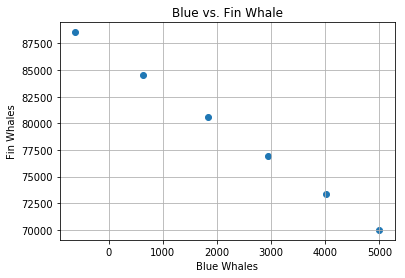

In [29]:
initial = [[5000, 70000]]
result = np. array(blueFinSIM(initial))
fig, ax1 = plt.subplots()
ax1.scatter(result[:, 0], result[:, 1])
ax1.set(xlabel= 'Blue Whales', ylabel= 'Fin Whales', 
        title= 'Blue vs. Fin Whale')
ax1.grid()

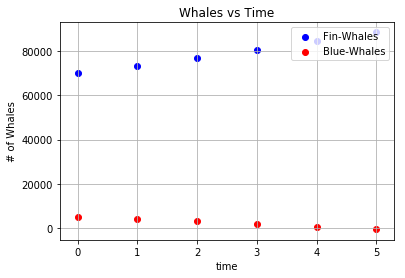

In [30]:
t = np.arange(0, result.shape[0])
fig1, ax2 = plt.subplots()
ax2.scatter(t, result[:, 1], c= 'b', label= 'Fin-Whales')
ax2.scatter(t, result[:, 0], c= 'r', label= 'Blue-Whales')
ax2.set(xlabel= 'time', ylabel= '# of Whales', 
        title= 'Whales vs Time')
ax2.legend(loc= 'upper right')
ax2.grid()

##### Q9 Part B:

**| [Question 9](#Question-9:) |**

* Determine the level of effort that maximizes the long-term harvest rate in blue whale units. 


* Simulate for $E = 500; 1000; 1500; 4000, 7500  \text{ boat-days per year}$
    * **[Results Table Part B](#Q9-Table-Part-B)**


* Which results in the Highest Sustainable Yield?
    * **Having $E = 4000$ results in the Highest Sustainable Yield.** 
    * **That is, whalers can have at max 4000 boats-days for harvesting while at the same time allowing that one of whale populations will continue to persist.**

In [31]:
# Results from the simulation where 𝐸=500; 1000; 1500; 7500 boat-days per year
result1 = np. array(blueFinSIM([[5000, 70000]], 500))
result2 = np. array(blueFinSIM([[5000, 70000]], 1000))
result3 = np. array(blueFinSIM([[5000, 70000]], 1500))
result4 = np. array(blueFinSIM([[5000, 70000]], 4000))
result5 = np. array(blueFinSIM([[5000, 70000]], 7500))

In [32]:
# Creates Dictionaries for each table prior to using 'pd.DataFrame.from_dict()' to create a dataframe
piece1 = {'Time': np.arange(0, result1.shape[0]), 'Blue Whales $E = 500$': result1[:,0], 'Fin Whales $E = 500$': result1[:,1]}
piece2 = {'Time': np.arange(0, result2.shape[0]), 'Blue Whales $E = 1000$': result2[:,0], 'Fin Whales $E = 1000$': result2[:,1]}
piece3 = {'Time': np.arange(0, result3.shape[0]), 'Blue Whales $E = 1500$': result3[:,0], 'Fin Whales $E = 1500$': result3[:,1]} 
piece4 = {'Time': np.arange(0, result4.shape[0]), 'Blue Whales $E = 4000$': result4[:,0],'Fin Whales $E = 4000$': result4[:,1]}
piece5 = {'Time': np.arange(0, result5.shape[0]), 'Blue Whales $E = 7500$': result5[:,0],'Fin Whales $E = 7500$': result5[:,1]}

In [33]:
# Creates Dataframe using 'pd.DataFrame.from_dict()' 
df1 = pd.DataFrame.from_dict(piece1)
df2 = pd.DataFrame.from_dict(piece2)
df3 = pd.DataFrame.from_dict(piece3)
df4 = pd.DataFrame.from_dict(piece4)
df5 = pd.DataFrame.from_dict(piece5)
frames = [df1, df2, df3, df4, df5]

##### Q9 Table Part B

[Jump Back](#Q9-Part-B:)

In [34]:
# Combines the litte dataframes to make a larger one
table1 = pd.concat(frames, axis=1)
table1.head(56)

,Time,Blue Whales $E = 500$,Fin Whales $E = 500$,Time,Blue Whales $E = 1000$,Fin Whales $E = 1000$,Time,Blue Whales $E = 1500$,Fin Whales $E = 1500$,Time,Blue Whales $E = 4000$,Fin Whales $E = 4000$,Time,Blue Whales $E = 7500$,Fin Whales $E = 7500$
0,0,5000.000000,70000.000000,0.0,5000.000000,70000.000000,0.0,5000.000000,70000.000000,0.0,5000.000000,70000.000000,0.0,5000.000000,70000.000000
1,1,5006.666667,74385.000000,1.0,4806.666667,74185.000000,1.0,4606.666667,73985.000000,1.0,3606.666667,72985.000000,1.0,2206.666667,71585.000000
2,2,5000.406506,78980.936432,2.0,4584.648729,78564.467232,2.0,4171.856284,78150.974032,2.0,2152.374062,76128.148032,2.0,-550.357049,73421.183632
3,3,4980.144091,83789.865630,3.0,4332.186958,83140.461636,3.0,3693.334024,82500.223393,3.0,633.404979,79434.257341,NaN,NaN,NaN
4,4,4944.780072,88812.802619,4.0,4047.498178,87914.189115,4.0,3168.832046,87034.362119,4.0,-954.111258,82907.984929,NaN,NaN,NaN
5,5,4893.196908,94049.612162,5.0,3728.783161,92885.914135,5.0,2596.056558,91754.245126,NaN,NaN,NaN,NaN,NaN,NaN
6,6,4824.265286,99498.904883,6.0,3374.235165,98054.876111,6.0,1972.695275,96659.898829,NaN,NaN,NaN,NaN,NaN,NaN
7,7,4736.851205,105157.941359,7.0,2982.049016,103419.211701,7.0,1296.425141,101750.455804,NaN,NaN,NaN,NaN,NaN,NaN
8,8,4629.823650,111022.547280,8.0,2550.430597,108975.885303,8.0,564.920178,107024.095236,NaN,NaN,NaN,NaN,NaN,NaN
9,9,4502.062776,117087.042894,9.0,2077.606619,114720.630136,9.0,-224.140716,112477.990939,NaN,NaN,NaN,NaN,NaN,NaN


##### Q9 Part C:

**| [Question 9](#Question-9:) |**

* Assume the following:
    * Whalers harvest at maximized rate for long term sustainability
    * What happens to both species long term
        * Do the grow back?
        * Go extinct?
        * How long for either situation?
        
        
* **Assuming that whalers harvest at maximized rate for long term sustainability, we can expect that the blue whale population will die out and the fin whale population will persist. This will happen somewhere after the 150 year mark. This is shown by the graph below.**

In [36]:
E = 4000 
equilibrium = (-28.542814221332*E+138207.31096645,-48.5728592889334*E+393089.634451677)
equilibrium

(24036.054081121983, 198798.19729594336)

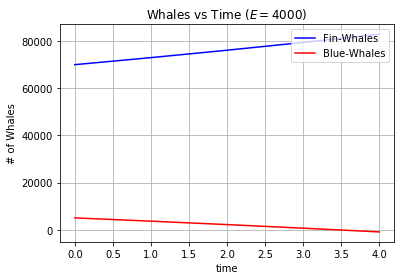

In [37]:
t = np.arange(0, result4.shape[0])
fig2, ax3 = plt.subplots()
ax3.plot(t, result4[:, 1], c= 'b', label= 'Fin-Whales')
ax3.plot(t, result4[:, 0], c= 'r', label= 'Blue-Whales')
ax3.set(xlabel= 'time', ylabel= '# of Whales', 
        title= 'Whales vs Time ($E = 4000$)')
ax3.legend(loc= 'upper right')
ax3.grid()

##### Q9 Part D:

**| [Question 9](#Question-9:) |**

* Some economist argue that whalers will act to maximize the long term sustainable yield for the entire industry. If so, would continued harvesting cause one or both species of whales to become extinct?
    $$\space$$
    * **Based upon [Part C](#Q9-Part-C:), we can expect that the blue whale species will become extinct w/ continued harvesting but the Fin Whale Population will continue to thrive at it continues to grow. The way one can perceive this is one of two ways:**
        $$\space$$
        * **1. If the only concern is to use the whale populations as a food source, then it is inconsequential. This is because as long as we can continue harvesting whales, it doesn't matter which one survives. Since the fin whales continue to persist despite harvesting, the current act to maximize the long term sustainable yield for the entire industry is okay.**
        $$\space$$
        * **2. If the concern is to not only use the whale populations as a food source but also to maintain a healthy ecosystem, then it is consequential. This is because the loss of blue whales has an effect on not only the fin whale population but also to other species in the ecosystem. While the current model does not show the effect blue whales have on other populations we could also work to include these relationships. In doing so we could simulate the complex relationships and validate any conservationists' concerns**